In [2]:
import pandas as pd
import numpy as np

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

In [4]:
!pip install nltk


Defaulting to user installation because normal site-packages is not writeable


In [5]:
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
from wordcloud import WordCloud


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Ashvika\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [6]:
df = pd.read_csv(r"C:\Users\Ashvika\Desktop\IMDB\imdb_processed.csv")


In [7]:
df.head()

,Unnamed: 0,title,year,kind,genre,rating,vote,country,language,cast,director,composer,writer,runtime
0,0,Dinosaur Planet,2003.0,tv mini series,"['Documentary', 'Animation', 'Family']",7.7,474.0,['United States'],['English'],"['Christian Slater', 'Scott Sampson']",NaN,NaN,"['Mike Carrol', 'Mike Carroll', 'Georgann Kane']",50.0
1,1,Get Up and Dance!,1994.0,video movie,['Family'],8.1,18.0,['United States'],['English'],"['Paula Abdul', 'Aurorah Allain', 'Bill Bohl',...",['Steve Purcell'],NaN,NaN,83.0
2,2,8 Man,1992.0,movie,"['Action', 'Sci-Fi']",5.5,93.0,['Japan'],['Japanese'],"['Kai Shishido', 'Etsushi Takahashi', 'Sachiko...",['Yasuhiro Horiuchi'],['Carole King'],"['Kazumasa Hirai', 'Jirô Kuwata', 'Junko Suzuki']",NaN
3,3,What the #$*! Do We (K)now!?,2004.0,movie,"['Documentary', 'Comedy', 'Drama', 'Fantasy', ...",5.3,13432.0,['United States'],"['English', 'German', 'Spanish']","['Marlee Matlin', 'Elaine Hendrix', 'John Ross...","['William Arntz', 'Betsy Chasse', 'Mark Vicente']",['Christopher Franke'],"['William Arntz', 'Betsy Chasse', 'Matthew Hof...",60.0
4,4,Class of Nuke 'Em High Part II: Subhumanoid Me...,1991.0,movie,"['Comedy', 'Horror', 'Sci-Fi']",4.5,2177.0,['United States'],['English'],"['Brick Bronsky', 'Lisa Gaye', 'Leesa Rowland'...",['Eric Louzil'],['Bob Mithoff'],"['Lloyd Kaufman', 'Carl Morano', 'Matt Unger']",96.0


In [8]:
df.columns

Index(['Unnamed: 0', 'title', 'year', 'kind', 'genre', 'rating', 'vote',
       'country', 'language', 'cast', 'director', 'composer', 'writer',
       'runtime'],
      dtype='object')

In [9]:
df = df.drop("Unnamed: 0",axis=1)

In [10]:
df.columns

Index(['title', 'year', 'kind', 'genre', 'rating', 'vote', 'country',
       'language', 'cast', 'director', 'composer', 'writer', 'runtime'],
      dtype='object')

In [11]:
df.shape

(8451, 13)

In [12]:
df.isnull().sum()

title          0
year           0
kind           0
genre         67
rating       316
vote         316
country      299
language     399
cast         171
director    1311
composer    2729
writer      1247
runtime     1653
dtype: int64

In [13]:
df[['rating','vote','runtime']] = df[['rating','vote','runtime']].fillna(df[['rating','vote','runtime']].mean() )

In [14]:
df.dropna(inplace=True)

In [15]:
df.isnull().sum()

title       0
year        0
kind        0
genre       0
rating      0
vote        0
country     0
language    0
cast        0
director    0
composer    0
writer      0
runtime     0
dtype: int64

In [16]:
df.dtypes

title        object
year        float64
kind         object
genre        object
rating      float64
vote        float64
country      object
language     object
cast         object
director     object
composer     object
writer       object
runtime     float64
dtype: object

In [17]:
df = df.astype({'year': int, 'runtime': int, 'vote': int})

In [18]:
df.dtypes

title        object
year          int32
kind         object
genre        object
rating      float64
vote          int32
country      object
language     object
cast         object
director     object
composer     object
writer       object
runtime       int32
dtype: object

In [19]:
df['id'] = df['title'] + '_' + df['year'].astype(str)


In [20]:
df = df[['id'] + [col for col in df.columns if col != 'id']]

In [21]:
df.columns

Index(['id', 'title', 'year', 'kind', 'genre', 'rating', 'vote', 'country',
       'language', 'cast', 'director', 'composer', 'writer', 'runtime'],
      dtype='object')

In [22]:
columns = ['genre','country','language','cast','director','writer','composer']

for column in columns:
    df[column] = df[column].astype(str).str.strip('[]')

In [23]:
quote_columns = ['genre','country','language','cast','director','writer','composer']

for quote in quote_columns:
    df[quote] = df[quote].str.replace(r"\'","", regex=True)

In [24]:
df.head()

,id,title,year,kind,genre,rating,vote,country,language,cast,director,composer,writer,runtime
2,8 Man_1992,8 Man,1992,movie,"Action, Sci-Fi",5.5,93,Japan,Japanese,"Kai Shishido, Etsushi Takahashi, Sachiko Ayase...",Yasuhiro Horiuchi,Carole King,"Kazumasa Hirai, Jirô Kuwata, Junko Suzuki",99
3,What the #$*! Do We (K)now!?_2004,What the #$*! Do We (K)now!?,2004,movie,"Documentary, Comedy, Drama, Fantasy, Mystery, ...",5.3,13432,United States,"English, German, Spanish","Marlee Matlin, Elaine Hendrix, John Ross Bowie...","William Arntz, Betsy Chasse, Mark Vicente",Christopher Franke,"William Arntz, Betsy Chasse, Matthew Hoffman",60
4,Class of Nuke 'Em High Part II: Subhumanoid Me...,Class of Nuke 'Em High Part II: Subhumanoid Me...,1991,movie,"Comedy, Horror, Sci-Fi",4.5,2177,United States,English,"Brick Bronsky, Lisa Gaye, Leesa Rowland, Micha...",Eric Louzil,Bob Mithoff,"Lloyd Kaufman, Carl Morano, Matt Unger",96
7,7 Seconds_2005,7 Seconds,2005,video movie,"Action, Comedy, Crime, Thriller",4.8,7153,"United Kingdom, Romania, Switzerland, United S...",English,"Wesley Snipes, Tamzin Outhwaite, Deobia Oparei...",Simon Fellows,"Barry Taylor, Neal Acree",Martin Wheeler,118
8,By Dawn's Early Light_1990,By Dawn's Early Light,1990,tv movie,"Action, Drama, Thriller",7.1,2898,United States,"English, Russian","Powers Boothe, Rebecca De Mornay, James Earl J...",Jack Sholder,Trevor Jones,"William Prochnau, Bruce Gilbert",58


In [25]:
df.rename(columns = {'kind':'category'},inplace=True)    

In [26]:

df.columns

Index(['id', 'title', 'year', 'category', 'genre', 'rating', 'vote', 'country',
       'language', 'cast', 'director', 'composer', 'writer', 'runtime'],
      dtype='object')

In [27]:
to_drop = ['composer']
df.drop(to_drop,axis = 1, inplace=True)

In [28]:
df.columns

Index(['id', 'title', 'year', 'category', 'genre', 'rating', 'vote', 'country',
       'language', 'cast', 'director', 'writer', 'runtime'],
      dtype='object')

In [29]:
len(df)-len(df.drop_duplicates())

5

In [30]:
df = df.drop_duplicates('id').sort_index()

In [31]:
len(df)-len(df.drop_duplicates())

0

In [32]:
df.shape

(5199, 13)

In [33]:
df["category"].value_counts()


category
movie          4017
tv movie        578
video movie     445
episode         151
tv short          6
video game        2
Name: count, dtype: int64

In [34]:
df_new = df[~df['category'].isin(['tv short', 'video game'])]
df_new["category"].value_counts()

category
movie          4017
tv movie        578
video movie     445
episode         151
Name: count, dtype: int64

In [35]:

df_new.replace(regex=r'tv movie', value='movie', inplace=True)
df_new.replace(regex=r'video movie', value='movie', inplace=True)
df_new["category"].value_counts()

C:\Users\Ashvika\AppData\Local\Temp\ipykernel_10168\2839905271.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new.replace(regex=r'tv movie', value='movie', inplace=True)
C:\Users\Ashvika\AppData\Local\Temp\ipykernel_10168\2839905271.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new.replace(regex=r'video movie', value='movie', inplace=True)


category
movie      5040
episode     151
Name: count, dtype: int64

In [36]:
df_new.head()

,id,title,year,category,genre,rating,vote,country,language,cast,director,writer,runtime
2,8 Man_1992,8 Man,1992,movie,"Action, Sci-Fi",5.5,93,Japan,Japanese,"Kai Shishido, Etsushi Takahashi, Sachiko Ayase...",Yasuhiro Horiuchi,"Kazumasa Hirai, Jirô Kuwata, Junko Suzuki",99
3,What the #$*! Do We (K)now!?_2004,What the #$*! Do We (K)now!?,2004,movie,"Documentary, Comedy, Drama, Fantasy, Mystery, ...",5.3,13432,United States,"English, German, Spanish","Marlee Matlin, Elaine Hendrix, John Ross Bowie...","William Arntz, Betsy Chasse, Mark Vicente","William Arntz, Betsy Chasse, Matthew Hoffman",60
4,Class of Nuke 'Em High Part II: Subhumanoid Me...,Class of Nuke 'Em High Part II: Subhumanoid Me...,1991,movie,"Comedy, Horror, Sci-Fi",4.5,2177,United States,English,"Brick Bronsky, Lisa Gaye, Leesa Rowland, Micha...",Eric Louzil,"Lloyd Kaufman, Carl Morano, Matt Unger",96
7,7 Seconds_2005,7 Seconds,2005,movie,"Action, Comedy, Crime, Thriller",4.8,7153,"United Kingdom, Romania, Switzerland, United S...",English,"Wesley Snipes, Tamzin Outhwaite, Deobia Oparei...",Simon Fellows,Martin Wheeler,118
8,By Dawn's Early Light_1990,By Dawn's Early Light,1990,movie,"Action, Drama, Thriller",7.1,2898,United States,"English, Russian","Powers Boothe, Rebecca De Mornay, James Earl J...",Jack Sholder,"William Prochnau, Bruce Gilbert",58


C:\Users\Ashvika\AppData\Local\Temp\ipykernel_10168\570792723.py:10: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plot = ax.set_xticklabels(ax.get_xticklabels(), rotation = 90)


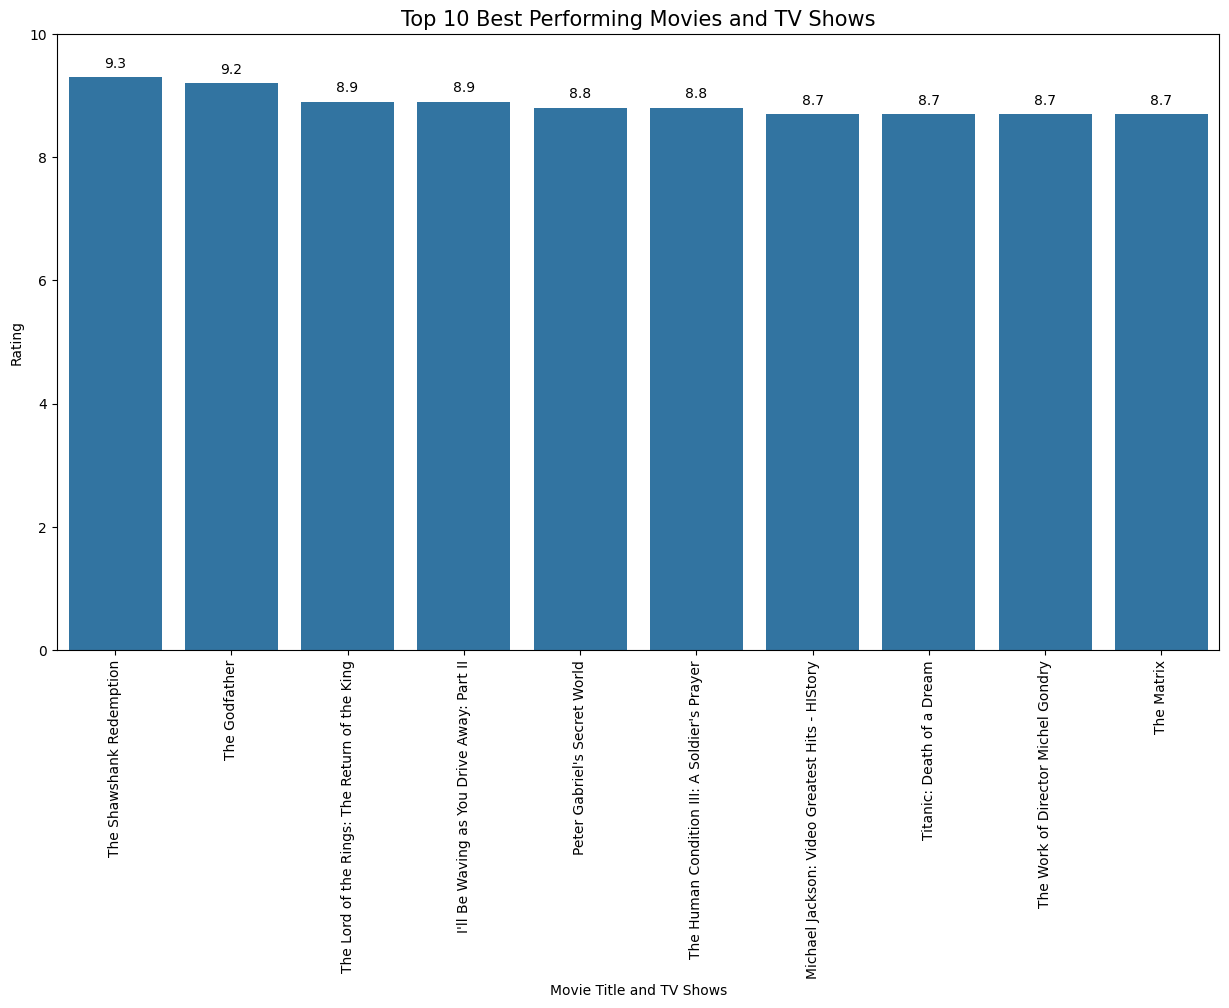

In [ ]:
#Top 10 Movies
fig = plt.figure(figsize = (15, 8))
ax = sns.barplot(x = 'title', y = 'rating', data = df_new.sort_values('rating', ascending=False)[0:10])
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.1f'), 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha = 'center', va = 'center', 
                xytext = (0, 10), 
                textcoords = 'offset points')
    
plot = ax.set_xticklabels(ax.get_xticklabels(), rotation = 90)
plt.xlabel('Movie Title and TV Shows')
plt.ylabel('Rating')
plt.title('Top 10 Best Performing Movies and TV Shows', fontsize = 15)
plt.yticks([0, 2, 4, 6, 8, 10])

plt.show()

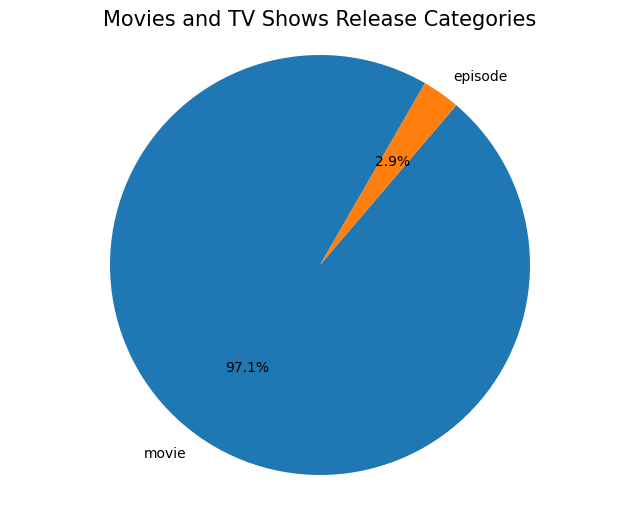

In [ ]:
#Categories
category_counts = df_new['category'].value_counts()
plt.figure(figsize=(8, 6))
plt.pie(
    category_counts,
    labels=category_counts.index,
    autopct='%1.1f%%',
    startangle=60
)
plt.title("Movies and TV Shows Release Categories", fontsize=15)
plt.axis('equal')  
plt.show()


In [ ]:
#Top Genres
genres_series = df_new['genre'].str.split(r',\s*').explode()
genre_counts = genres_series.value_counts().reset_index()
genre_counts.columns = ['genre', 'count']
genre_counts.head()

,genre,count
0,Drama,2803
1,Comedy,1626
2,Romance,1205
3,Thriller,1157
4,Action,1061


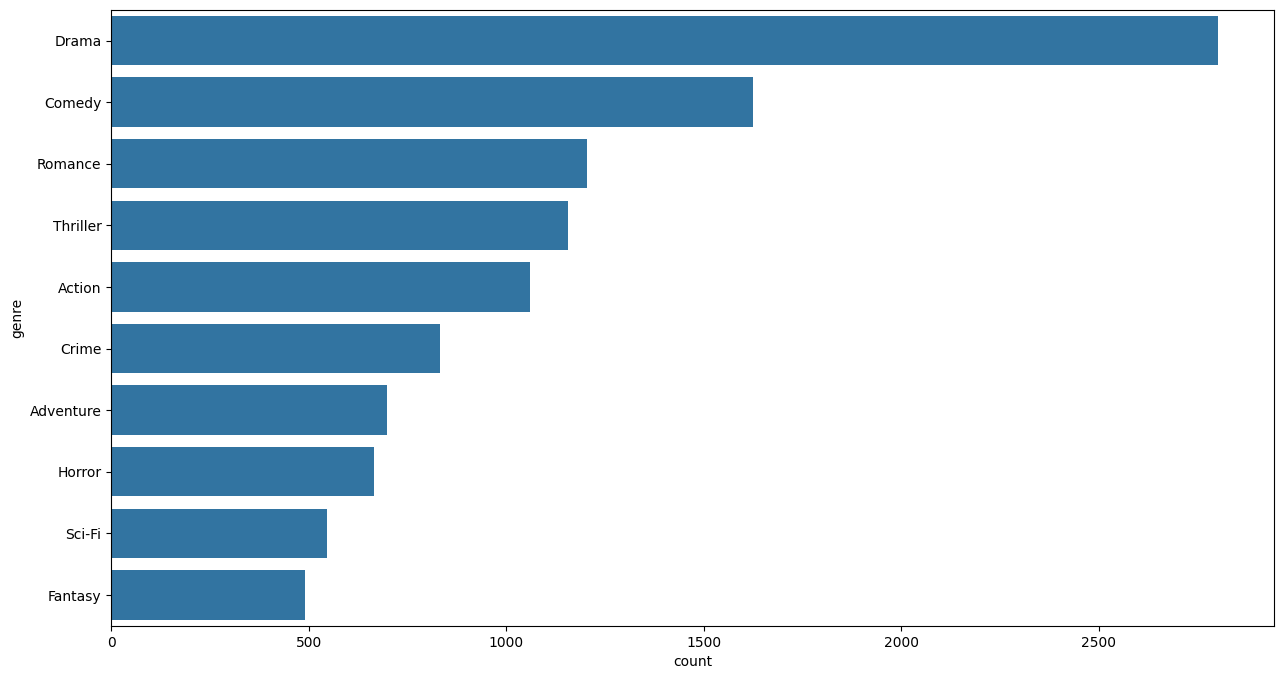

In [65]:
# Top 10 genres

figure = plt.figure(figsize=(15,8))
ax = sns.barplot(x="count", y="genre", data=genre_counts.sort_values("count", ascending=False).head(10))

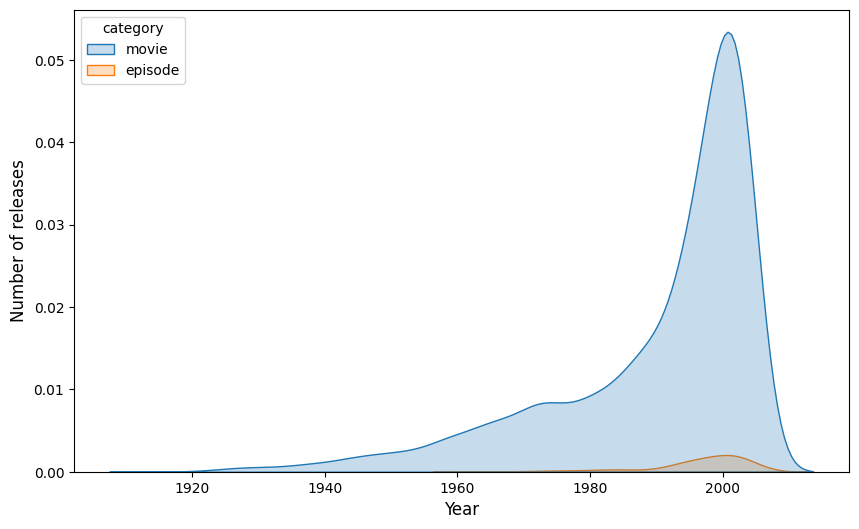

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
#Total number of releases each year
plt.figure(figsize=(10, 6))
sns.kdeplot(data=df_new, x="year", hue="category", fill=True)


plt.xlabel("Year", fontsize=12)
plt.ylabel("Number of releases", fontsize=12)
plt.show()


In [73]:
top_countries = df_new["country"].str.split(r',\s*').explode()
top_countries = top_countries.value_counts().reset_index()
top_countries.columns= ['Country','Count']
top_countries.head(10)

,Country,Count
0,United States,2793
1,United Kingdom,834
2,France,489
3,Canada,404
4,Japan,381
5,Germany,243
6,India,240
7,Hong Kong,240
8,Italy,239
9,Spain,129


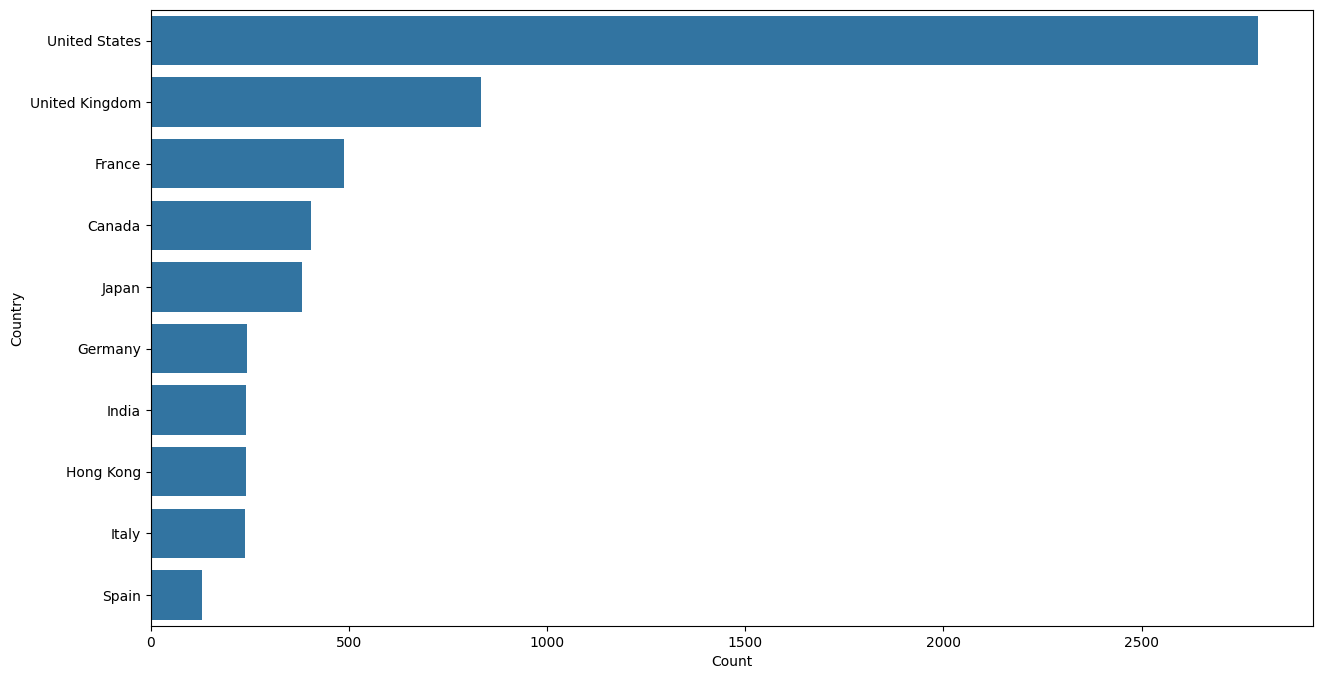

In [82]:
figures = plt.figure(figsize = (15,8))
ax = sns.barplot(x="Count", y ="Country",data = top_countries.sort_values("Count",ascending=False).head(10))


In [90]:
toplang = df_new['language'].str.split(r',\s*').explode()
toplangcount = toplang.value_counts().reset_index()
toplangcount.columns = ['language','Count']
toplangcount.head(10)

,language,Count
0,English,4015
1,French,515
2,Japanese,387
3,Spanish,321
4,German,262
5,Italian,259
6,Hindi,233
7,Cantonese,214
8,Mandarin,148
9,Russian,118


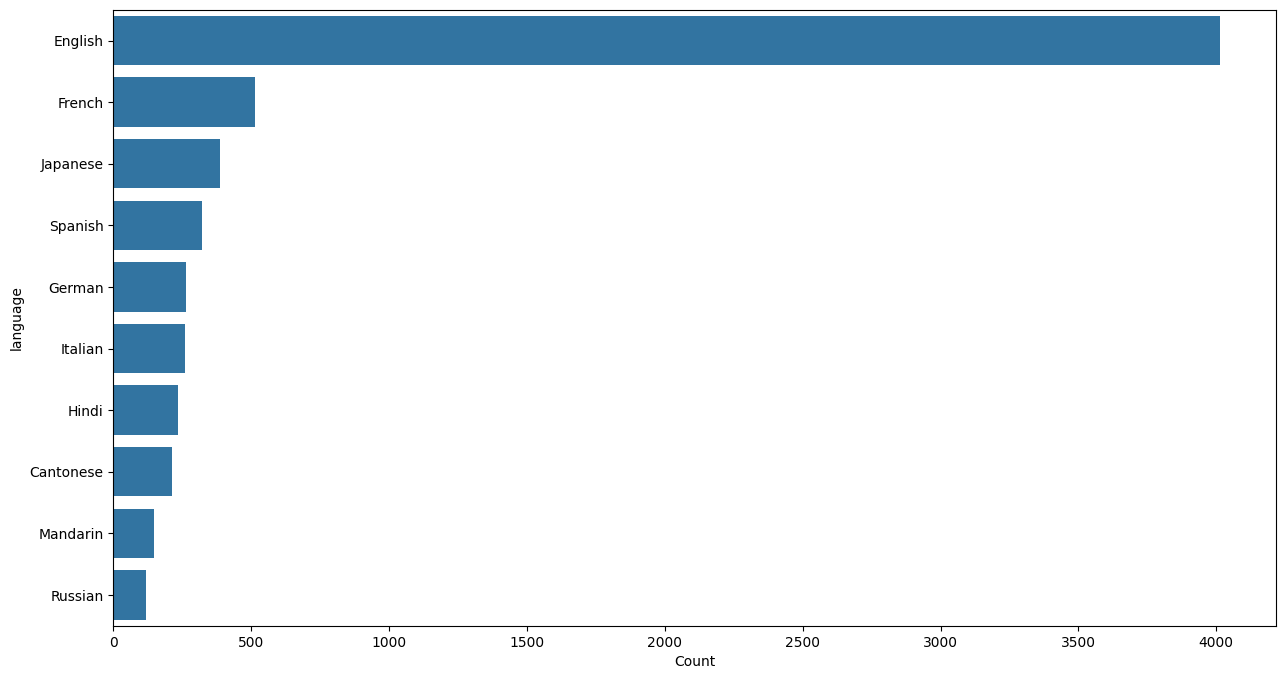

In [92]:
figure = plt.figure(figsize=(15,8))
ax = sns.barplot(x='Count',y = 'language',data =toplangcount.sort_values('Count',ascending=False).head(10))


In [95]:
topdirectors = df_new['director'].str.split(r',\s*').explode()
topdirectors_count = topdirectors.value_counts().reset_index()
topdirectors_count.columns =['director','count']
topdirectors_count.head(10)

,director,count
0,Akira Kurosawa,18
1,Federico Fellini,15
2,Jim Wynorski,14
3,Johnnie To,14
4,Jing Wong,13
5,Ishirô Honda,13
6,Alfred Hitchcock,12
7,Tom Clegg,12
8,Takashi Miike,12
9,Andrew Lau,11


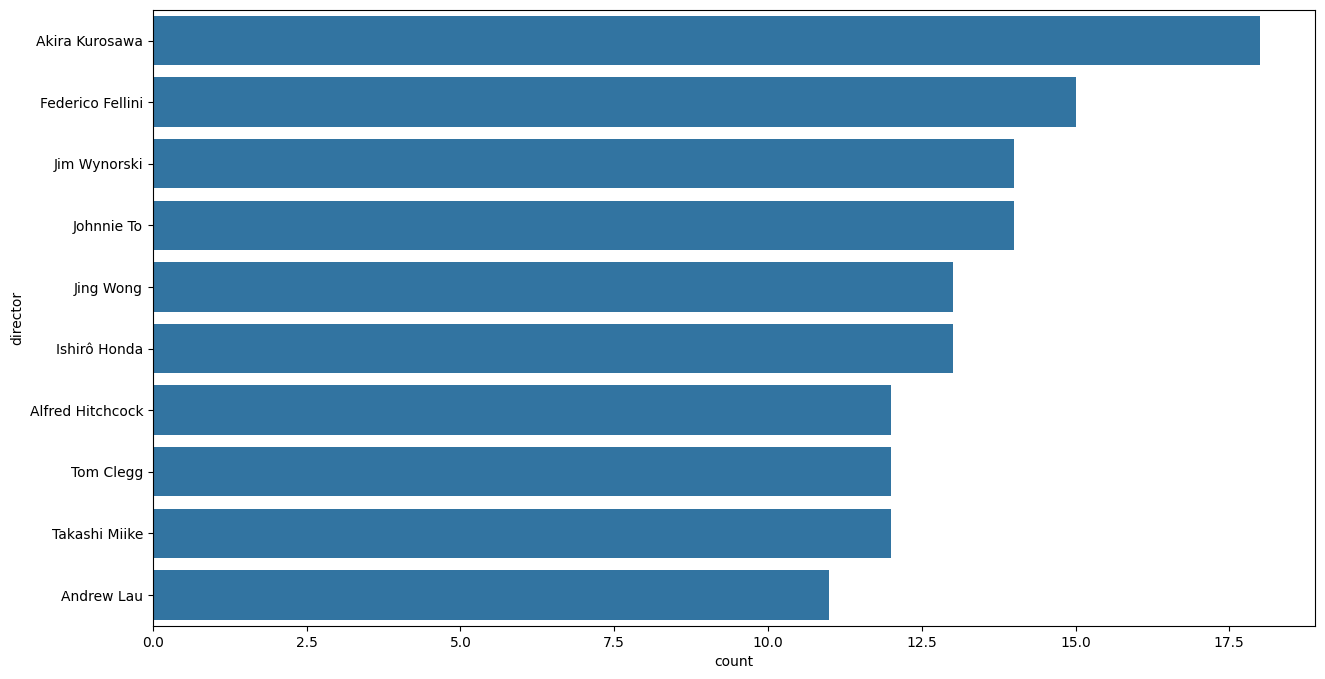

In [98]:
figure = plt.figure(figsize=(15,8))
ax = sns.barplot(x='count',y='director',data=topdirectors_count.sort_values('count',ascending=False).head(10))


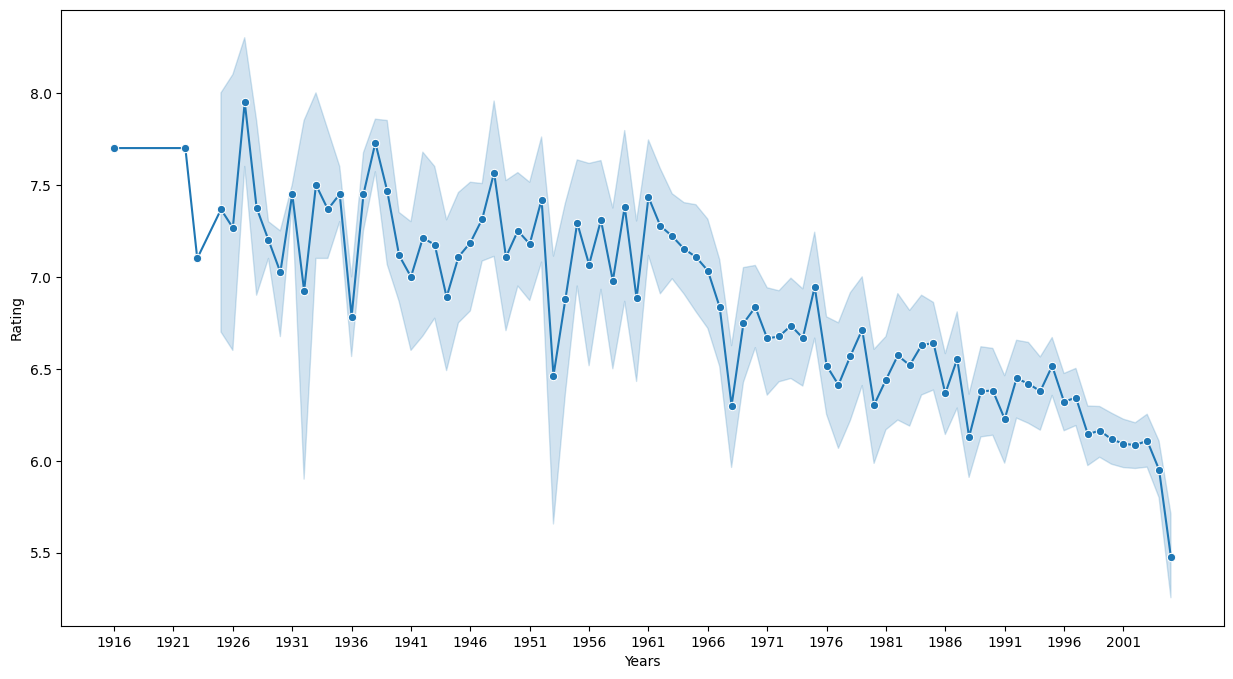

In [100]:
plt.figure(figsize=(15, 8))
ax = sns.lineplot(x='year', y='rating', data=df_new, marker='o')

# Set x-axis ticks for every 5 years
plt.xticks(range(df_new['year'].min(), df_new['year'].max() + 1, 5))

plt.xlabel('Years')
plt.ylabel('Rating')
plt.show()


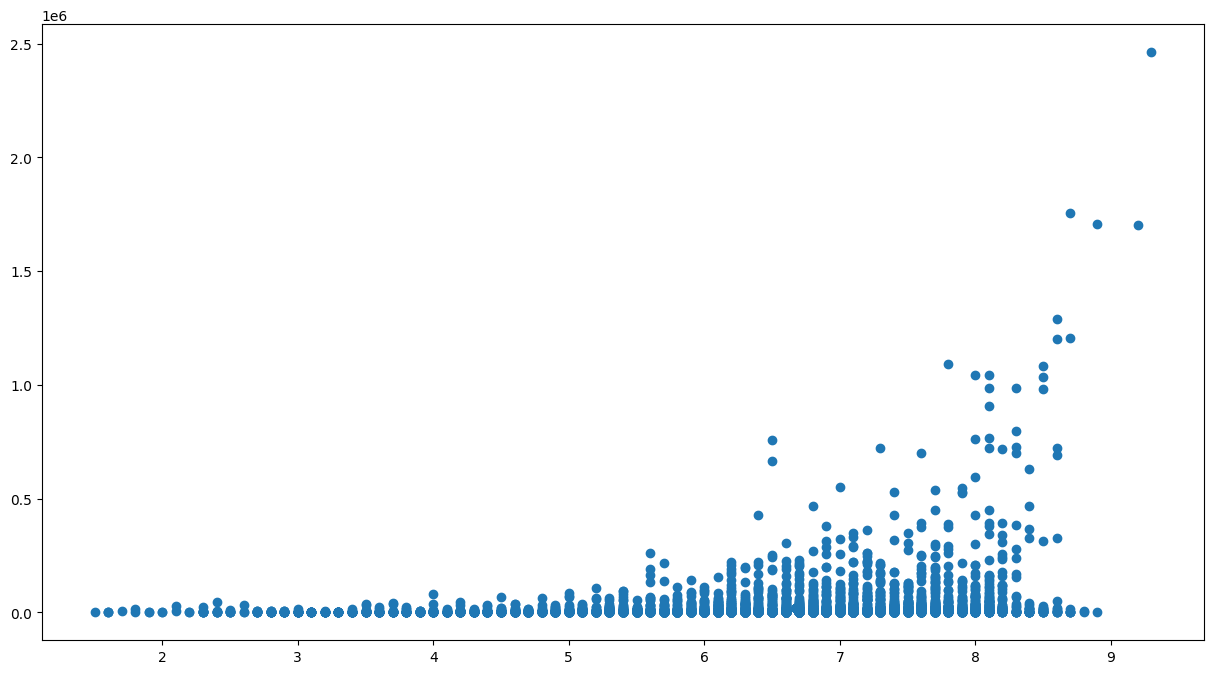

In [101]:
figure = plt.figure(figsize = (15,8))
plt.scatter(x='rating',y='vote',data = df_new)
plt.show()

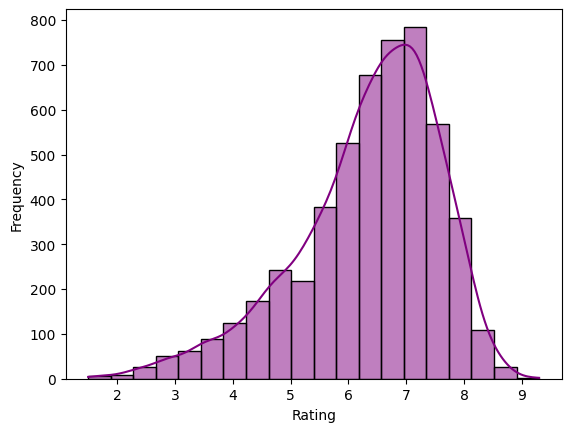

In [105]:
#Distribution of Movie Ratings
sns.histplot(df_new['rating'], bins=20, kde=True, color='purple')
plt.xlabel("Rating")
plt.ylabel("Frequency")
plt.show()


In [106]:
df_new.to_csv("C:/Users/Ashvika/Documents/imdb_df_new_ready.csv", index=False)